In [1]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


# 1-Reading the data

In [2]:
ids= pd.read_csv('category_ids.csv')

In [3]:
trend_data=pd.read_csv('US_youtube_trending_data.csv')

# 2-Describe the data

In [30]:
trend_data.shape , ids.shape

((16798, 16), (32, 2))

In [31]:
trend_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16798 entries, 0 to 16797
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           16798 non-null  object
 1   title              16798 non-null  object
 2   publishedAt        16798 non-null  object
 3   channelId          16798 non-null  object
 4   channelTitle       16798 non-null  object
 5   categoryId         16798 non-null  int64 
 6   trending_date      16798 non-null  object
 7   tags               16798 non-null  object
 8   view_count         16798 non-null  int64 
 9   likes              16798 non-null  int64 
 10  dislikes           16798 non-null  int64 
 11  comment_count      16798 non-null  int64 
 12  thumbnail_link     16798 non-null  object
 13  comments_disabled  16798 non-null  bool  
 14  ratings_disabled   16798 non-null  bool  
 15  description        16707 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

In [32]:
ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   categoryId  32 non-null     int64 
 1   category    32 non-null     object
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


In [33]:
trend_data.describe

<bound method NDFrame.describe of           video_id                                              title  \
0      3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1      M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands â€“ â...   
2      J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3      kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4      VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   
...            ...                                                ...   
16793  eR3usT9bKCk       Quando Rondo - Way Up [Official Music Video]   
16794  8yAscSQoTgQ                           Bryant Myers - Se Fuerte   
16795  UthWoHf8wWQ  Civil TV: King Von Welcome to My Neighborhood:...   
16796  Go2-0svsdBM  LARRY WHEELS vs SCHOOLBOY LEFT-HANDED AND RIGH...   
16797       #NAME?                      I Quit Fortnite to do this...   

                publishedAt                 channelId     channelTitle  \
0      2020-08-

In [34]:
ids.describe

<bound method NDFrame.describe of     categoryId               category
0            2       Autos & Vehicles
1            1       Film & Animation
2           10                  Music
3           15         Pets & Animals
4           17                 Sports
5           18           Short Movies
6           19        Travel & Events
7           20                 Gaming
8           21          Videoblogging
9           22         People & Blogs
10          23                 Comedy
11          24          Entertainment
12          25        News & Politics
13          26          Howto & Style
14          27              Education
15          28   Science & Technology
16          29  Nonprofits & Activism
17          30                 Movies
18          31        Anime/Animation
19          32       Action/Adventure
20          33               Classics
21          34                 Comedy
22          35            Documentary
23          36                  Drama
24          37  

In [35]:
trend_data.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [36]:
ids.columns

Index(['categoryId', 'category'], dtype='object')

In [37]:
type(trend_data), type(ids)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

# 3-Delete some columns

In [38]:
trend_data.drop(columns=['video_id', 'thumbnail_link', 'comments_disabled', 'ratings_disabled'] ,inplace=True)

In [39]:
trend_data.columns

Index(['title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId',
       'trending_date', 'tags', 'view_count', 'likes', 'dislikes',
       'comment_count', 'description'],
      dtype='object')

# 4-Convert to datatime format

In [40]:
trend_data['publishedAt'] = pd.to_datetime(trend_data['publishedAt'])
trend_data['trending_date'] = pd.to_datetime(trend_data['trending_date'])

trend_data['date_published']=trend_data['publishedAt'].dt.date
trend_data['time_published']=trend_data['publishedAt'].dt.time

trend_data['date_trending']=trend_data['trending_date'].dt.date
trend_data['time_trending']=trend_data['trending_date'].dt.time

trend_data.columns

Index(['title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId',
       'trending_date', 'tags', 'view_count', 'likes', 'dislikes',
       'comment_count', 'description', 'date_published', 'time_published',
       'date_trending', 'time_trending'],
      dtype='object')

# 5-Calculate month of published and trending

In [41]:
pd.DatetimeIndex(trend_data['date_trending']).month
trend_data['month_trending']=pd.DatetimeIndex(trend_data['date_trending']).month_name().str[:3]
trend_data['month_published']=pd.DatetimeIndex(trend_data['date_published']).month_name().str[:3]
trend_data

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,date_published,time_published,date_trending,time_trending,month_trending,month_published
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS â–¶ http://bit.ly/Subscr...,2020-08-11,19:20:14,2020-08-12,00:00:00,Aug,Aug
1,Apex Legends | Stories from the Outlands â€“ â...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare...",2020-08-11,17:00:10,2020-08-12,00:00:00,Aug,Aug
2,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...,2020-08-11,16:34:06,2020-08-12,00:00:00,Aug,Aug
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL â†’ http://bit.ly/subscribe-x...,2020-08-11,16:38:55,2020-08-12,00:00:00,Aug,Aug
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...,2020-08-11,15:10:05,2020-08-12,00:00:00,Aug,Aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16793,Quando Rondo - Way Up [Official Music Video],2020-10-28 17:00:11+00:00,UCLr1r2bBAwBPG3KJubtYyyg,Quando Rondo,10,2020-11-04 00:00:00+00:00,Quando Rondo|Atlantic|Records|1633|Hip|Hop|Rap...,351316,20974,339,1237,Quando Rondo - Way UpStream/Download 'Diary of...,2020-10-28,17:00:11,2020-11-04,00:00:00,Nov,Oct
16794,Bryant Myers - Se Fuerte,2020-10-29 22:00:10+00:00,UCtvXogmrPwTNXOefkdKXYJg,BryantMyersVEVO,10,2020-11-04 00:00:00+00:00,Bryant|Myers|Fuerte|EONE|Latin,2526049,116939,1923,6081,NEW album/ NUEVO album â€œBendecidoâ€ Availa...,2020-10-29,22:00:10,2020-11-04,00:00:00,Nov,Oct
16795,Civil TV: King Von Welcome to My Neighborhood:...,2020-10-27 22:54:10+00:00,UC8sl9EAOqIwKN9jcnMcdGWw,Karen Civil,24,2020-11-04 00:00:00+00:00,king von|o block|chicago|63rd|civiltv|karen ci...,951521,24267,903,3327,O Block's King Von is the latest artist to app...,2020-10-27,22:54:10,2020-11-04,00:00:00,Nov,Oct
16796,LARRY WHEELS vs SCHOOLBOY LEFT-HANDED AND RIGH...,2020-10-28 19:45:09+00:00,UCeU05pwtEAreeF81saVb9XQ,Larry Wheels,17,2020-11-04 00:00:00+00:00,larry wheels|larrywheels|pr|personal record|pr...,1396497,54119,977,12181,Visit Team Personal Record for NEW Programs an...,2020-10-28,19:45:09,2020-11-04,00:00:00,Nov,Oct


# 6-calculate lag time between posting and trending

In [42]:
trend_data['lag']=trend_data['trending_date']-trend_data['publishedAt']
trend_data.columns ,ids.columns




(Index(['title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId',
        'trending_date', 'tags', 'view_count', 'likes', 'dislikes',
        'comment_count', 'description', 'date_published', 'time_published',
        'date_trending', 'time_trending', 'month_trending', 'month_published',
        'lag'],
       dtype='object'),
 Index(['categoryId', 'category'], dtype='object'))

# 7-convert category IDs to category

In [43]:
trend_data=pd.merge(ids, trend_data, on='categoryId', how='right')
#trend_data
#trend_data.sort_values("lag", inplace = False)


# 8-change name of features

In [44]:
trend_data = trend_data.rename(columns = {"channelTitle":"channel","view_count":"views","comment_count":"comments"} )
trend_data.columns ,ids.columns
#trend_data.isna().sum()

(Index(['categoryId', 'category', 'title', 'publishedAt', 'channelId',
        'channel', 'trending_date', 'tags', 'views', 'likes', 'dislikes',
        'comments', 'description', 'date_published', 'time_published',
        'date_trending', 'time_trending', 'month_trending', 'month_published',
        'lag'],
       dtype='object'),
 Index(['categoryId', 'category'], dtype='object'))

# 9-delete duplicate

In [27]:
#trend_data.sort_values("title", inplace = True)
trend_data.drop_duplicates(subset ="title", keep = 'first', inplace = True)
#trend_data

,categoryId,category_x,category_y,title,publishedAt,channelId,channel,trending_date,tags,views,likes,dislikes,comments,description,date_published,time_published,date_trending,time_trending,lag
0,22,People & Blogs,People & Blogs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS â–¶ http://bit.ly/Subscr...,2020-08-11,19:20:14,2020-08-12,00:00:00,0 days 04:39:46
1,22,People & Blogs,People & Blogs,i don't know what im doing anymore,2020-08-11 20:24:34+00:00,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,2020-08-12 00:00:00+00:00,[None],940036,87111,1860,7052,ssend love to my sponsor; for a super Limited ...,2020-08-11,20:24:34,2020-08-12,00:00:00,0 days 03:35:26
2,22,People & Blogs,People & Blogs,Try Not To Laugh Challenge #51,2020-08-11 17:00:31+00:00,UCYJPby9DRCteedh5tfxVbrw,Smosh Pit,2020-08-12 00:00:00+00:00,smosh|smosh pit|smosh games|funny|comedy,591837,44168,409,2652,You know what time it isâ€” time to try not to...,2020-08-11,17:00:31,2020-08-12,00:00:00,0 days 06:59:29
3,22,People & Blogs,People & Blogs,Ten Minutes with Tyler Cameron | Q&A,2020-08-11 22:00:05+00:00,UCMw7m-ScQ6jV1FQzQnn1y8Q,Tyler Cameron,2020-08-12 00:00:00+00:00,the bachelor|the bachelorette|Tyler c|Tyler Ca...,105955,4511,69,673,Come hang out me with me for 10 minutes where ...,2020-08-11,22:00:05,2020-08-12,00:00:00,0 days 01:59:55
4,22,People & Blogs,People & Blogs,Our Farm Got Destroyed.,2020-08-11 23:00:06+00:00,UCuxlXCfVyV-i5YLL30jkomw,Cole The Cornstar,2020-08-12 00:00:00+00:00,farming|family farm|agriculture|agriculture jo...,277338,37533,197,3666,"Wind storm, rain, and lots of destruction; wel...",2020-08-11,23:00:06,2020-08-12,00:00:00,0 days 00:59:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16773,29,Nonprofits & Activism,Nonprofits & Activism,Nisswa Mayor Arrested for Involvement in Traff...,2020-09-01 04:50:02+00:00,UC2RbTnQ9sr6r1FgbFKf-fOA,Lakeland PBS,2020-09-03 00:00:00+00:00,Lakeland PBS|LPTV|PBS|Bemidji|Minnesota|MN,345993,5829,172,3209,"Originally aired August 31, 2020For more infor...",2020-09-01,04:50:02,2020-09-03,00:00:00,1 days 19:09:58
16778,29,Nonprofits & Activism,Nonprofits & Activism,Fast Times At Ridgemont High | Virtual Table R...,2020-09-18 04:44:13+00:00,UCLKeNNZBAsSyN3n1SHYGDnw,CORE,2020-09-21 00:00:00+00:00,[None],2139440,26578,473,2736,Ridgemont High is back in session! Here is #Fa...,2020-09-18,04:44:13,2020-09-21,00:00:00,2 days 19:15:47
16782,29,Nonprofits & Activism,Nonprofits & Activism,RETURNING To YouTube? Our CHARITY FUNDRAISER! ...,2020-10-20 16:59:18+00:00,UC6kFD5xIFvWyLlytv5pTR1w,DissociaDID,2020-10-21 00:00:00+00:00,did|dissociative identity disorder|multiple pe...,171898,39510,442,7770,ORLA GARTLAND:Between My Teeth: https://www.yo...,2020-10-20,16:59:18,2020-10-21,00:00:00,0 days 07:00:42
16784,29,Nonprofits & Activism,Nonprofits & Activism,It Counts,2020-10-21 21:15:10+00:00,UCuQ9PbS08dQJNWfwjQE-Fnw,Annie LeBlanc,2020-10-23 00:00:00+00:00,Annie LeBlanc|Annie|LeBlanc|AnnieLeBlanc|Lilia...,230407,25549,410,2188,"To learn more about voting, head to this link ...",2020-10-21,21:15:10,2020-10-23,00:00:00,1 days 02:44:50


# 10- sort by likes

In [58]:
trend_data.sort_values("likes",ascending=False,inplace = True)
trend_data
#trend_data.time_published.unique()

,categoryId,category,title,publishedAt,channelId,channel,trending_date,tags,views,likes,dislikes,comments,description,date_published,time_published,date_trending,time_trending,month_trending,month_published,lag
6765,10,Music,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,2020-08-28 00:00:00+00:00,BIGHIT|ë¹…ížˆíŠ¸|ë°©íƒ„ì†Œë…„ë‹¨|BTS|BANGTAN|ë...,232649205,15735533,714194,6065230,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MVCr...,2020-08-21,03:58:10,2020-08-28,00:00:00,Aug,Aug,6 days 20:01:50
6709,10,Music,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,2020-08-27 00:00:00+00:00,BIGHIT|ë¹…ížˆíŠ¸|ë°©íƒ„ì†Œë…„ë‹¨|BTS|BANGTAN|ë...,219110491,15460822,674291,5810680,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MVCr...,2020-08-21,03:58:10,2020-08-27,00:00:00,Aug,Aug,5 days 20:01:50
6647,10,Music,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,2020-08-26 00:00:00+00:00,BIGHIT|ë¹…ížˆíŠ¸|ë°©íƒ„ì†Œë…„ë‹¨|BTS|BANGTAN|ë...,208581468,15246496,646349,5744496,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MVCr...,2020-08-21,03:58:10,2020-08-26,00:00:00,Aug,Aug,4 days 20:01:50
6586,10,Music,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,2020-08-25 00:00:00+00:00,BIGHIT|ë¹…ížˆíŠ¸|ë°©íƒ„ì†Œë…„ë‹¨|BTS|BANGTAN|ë...,200692965,14994034,621578,5623570,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MVCr...,2020-08-21,03:58:10,2020-08-25,00:00:00,Aug,Aug,3 days 20:01:50
6535,10,Music,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,2020-08-24 00:00:00+00:00,BIGHIT|ë¹…ížˆíŠ¸|ë°©íƒ„ì†Œë…„ë‹¨|BTS|BANGTAN|ë...,183414472,14678048,576852,5748638,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MVCr...,2020-08-21,03:58:10,2020-08-24,00:00:00,Aug,Aug,2 days 20:01:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15748,17,Sports,Eliminatorias | Ecuador vs Uruguay | Fecha 2,2020-10-14 01:06:40+00:00,UCzU8-lZlRfkV3nj0RzAZdrQ,CONMEBOL,2020-10-14 00:00:00+00:00,fÃºtbol|pelota|gol|copa|libertadores|sudameric...,623031,0,0,2360,Ecuador venciÃ³ 4-2 a Uruguay este martes en l...,2020-10-14,01:06:40,2020-10-14,00:00:00,Oct,Oct,-1 days +22:53:20
13805,25,News & Politics,Protesters demand Portland mayor's resignation,2020-09-01 14:07:05+00:00,UCXIJgqnII2ZOINSWNOGFThA,Fox News,2020-09-04 00:00:00+00:00,Fox News Channel|Fox News|News|america's newsr...,1120275,0,0,0,Demonstrators set fire outside mayor's condo b...,2020-09-01,14:07:05,2020-09-04,00:00:00,Sep,Sep,2 days 09:52:55
2129,20,Gaming,FINAL FANTASY XIV - Break the Limit!,2020-09-24 10:20:50+00:00,UCpx2BZg8ABgaDV50sGJtWAg,FINAL FANTASY XIV,2020-09-25 00:00:00+00:00,FF14|FFXIV|Final Fantasy XIV (Video Game)|ãƒ•ã...,289494,0,0,0,NaN,2020-09-24,10:20:50,2020-09-25,00:00:00,Sep,Sep,0 days 13:39:10
501,22,People & Blogs,Behind the Scenes of My Sailor Photoshoot,2020-09-08 21:16:38+00:00,UCWkYXtnAuu7VTLPwUcRSB6A,Kylie Jenner,2020-09-09 00:00:00+00:00,Kylie Cosmetics|Kylie Jenner|Makeup|BTS|Behind...,1286513,0,0,4643,Come behind the scenes with me at the photosho...,2020-09-08,21:16:38,2020-09-09,00:00:00,Sep,Sep,0 days 02:43:22


# 11- how many videos were published in every day in the dataset

In [64]:
trend_data.columns

#cities = ipl_df.groupby('city')[['id']].count()

n_published=trend_data.groupby('date_published')['title'].count()
type(n_published)
n_published=n_published.to_frame()
n_published.sort_values("date_published",inplace = True)
n_published

,title
date_published,
2020-08-03,4
2020-08-05,4
2020-08-06,37
2020-08-07,73
2020-08-08,93
...,...
2020-10-31,109
2020-11-01,77
2020-11-02,63


# 12-plot number of videos were published every day

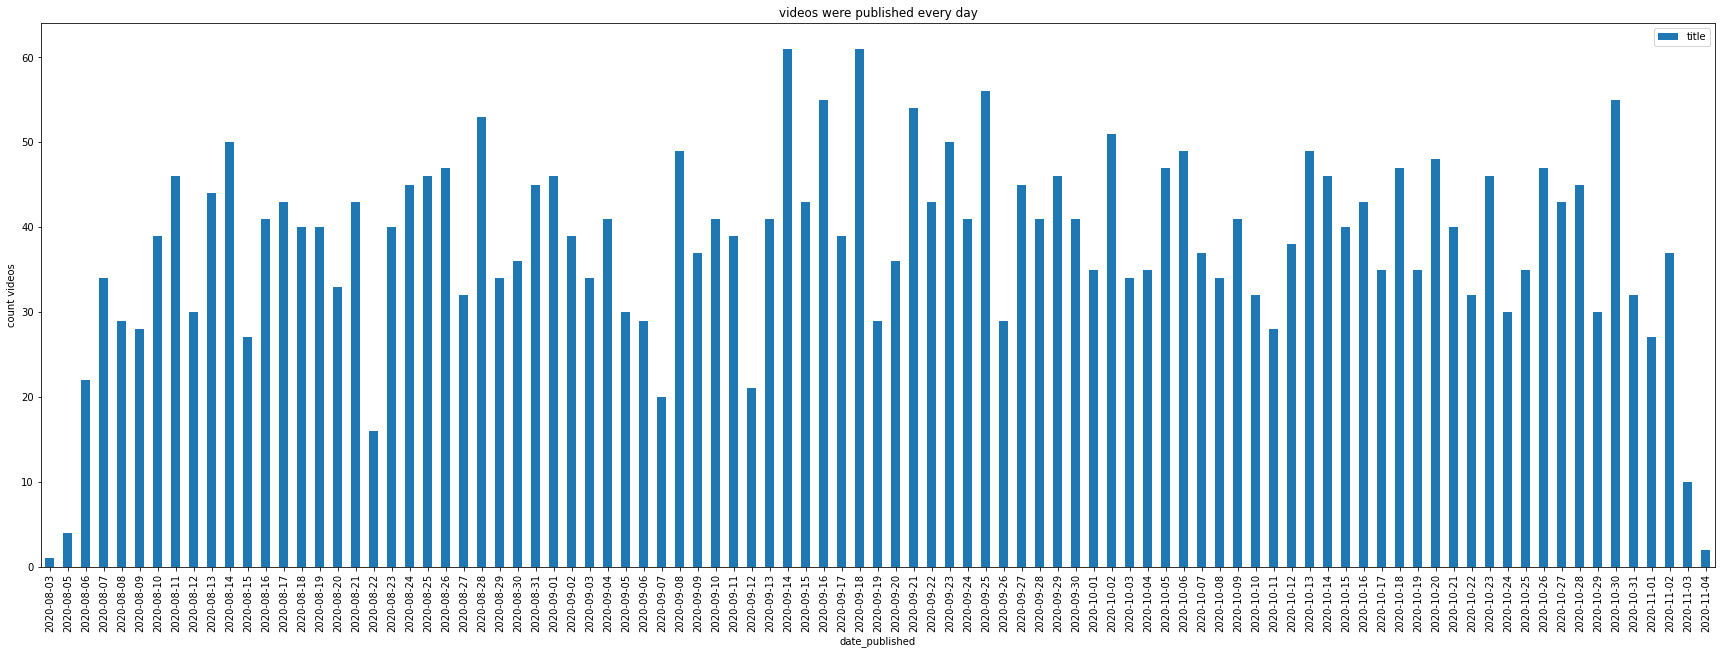

In [221]:
fig , ax = plt.subplots(figsize = (30,10))
n_published.plot(ax = ax, kind = 'bar')
ax.set_title("videos were published every day")
ax.set_ylabel("count videos");
##gym.groupby('n_published').count().plot(kind='bar')

# 13- number of published, viewing and trending

In [110]:
published_views=trend_data.groupby(['month_published']).agg({'date_published':['count'],'views':['sum']})
trending = trend_data.groupby(['month_trending']).agg({'title':['count']})

#published_views=pd.DataFrame(published_views)
published_views ,trending 
#,trending

#trending_published=pd.merge(published_views, trending, on='month', how='right')


(                date_published        views
                          count          sum
 month_published                            
 Aug                       4729  13893701204
 Nov                        154    259547415
 Oct                       5909  16197369176
 Sep                       6006  14576786013,
                title
                count
 month_trending      
 Aug             4000
 Nov              800
 Oct             5998
 Sep             6000)

In [77]:
trending = trending.rename(columns = {"month_trending":"month", } )
published_views = published_views.rename(columns = {"month_published":"month"} )
published_views.columns

MultiIndex([('date_published', 'count'),
            (         'views',   'sum')],
           )

# 14-histogram plot for lag time

(array([1.72228718e-06, 1.80719495e-06, 2.13610086e-07, 1.78753210e-09,
        6.70324537e-10, 1.78753210e-09, 1.34064907e-09, 6.70324537e-10,
        1.34064907e-09, 2.68129815e-09]),
 array([ -32683. ,  233744.2,  500171.4,  766598.6, 1033025.8, 1299453. ,
        1565880.2, 1832307.4, 2098734.6, 2365161.8, 2631589. ]),
 <BarContainer object of 10 artists>)

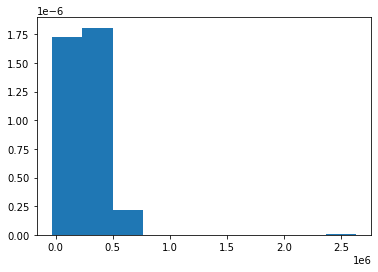

In [100]:
lag=list(trend_data['lag'])
lag=trend_data['lag'].astype('timedelta64[s]')
#lag=datetime.strptime(lag , '%Y-%m-%d %H:%M:%S')
plt.hist(lag, density= True)


# 15-month for mostliked videos & how many videos to see

In [101]:
trend_data.columns

Index(['categoryId', 'category', 'title', 'publishedAt', 'channelId',
       'channel', 'trending_date', 'tags', 'views', 'likes', 'dislikes',
       'comments', 'description', 'date_published', 'time_published',
       'date_trending', 'time_trending', 'month_trending', 'month_published',
       'lag'],
      dtype='object')

In [106]:
likes=trend_data.groupby(['month_published','channelId']).agg({'likes':['sum']})
likes

likes
                                              sum
month_published channelId                        
Aug             UC-2MJlKSq9_pYk5-bdvMhnw     7489
                UC-2Y8dQb0S6DtpxNgAKoJKA   463741
                UC-8Q-hLdECwQmaWNwXitYDw  5850288
                UC-J-KZfRV8c13fOCkhXdLiQ  1901858
                UC-OO324clObi3H-U0bP77dw   430520
...                                           ...
Sep             UCzfyYtgvkx5mLy8nlLlayYg  2592858
                UCzpCc5n9hqiVC7HhPwcIKEg    56387
                UCzpl23pGTHVYqvKsgY0A-_w   150489
                UCzxG2q7N8jgMXaxjE6iVTDA   463315
                UCzznO4xSV8BKnUBPyswtCUw    15787

[2371 rows x 1 columns]

In [107]:
views=trend_data.groupby(['month_published','channelId']).agg({'views':['sum']})
views

views
                                               sum
month_published channelId                         
Aug             UC-2MJlKSq9_pYk5-bdvMhnw    901892
                UC-2Y8dQb0S6DtpxNgAKoJKA  11300162
                UC-8Q-hLdECwQmaWNwXitYDw  74621397
                UC-J-KZfRV8c13fOCkhXdLiQ  25623557
                UC-OO324clObi3H-U0bP77dw   7070022
...                                            ...
Sep             UCzfyYtgvkx5mLy8nlLlayYg  20327318
                UCzpCc5n9hqiVC7HhPwcIKEg   1767953
                UCzpl23pGTHVYqvKsgY0A-_w   1501778
                UCzxG2q7N8jgMXaxjE6iVTDA  17531023
                UCzznO4xSV8BKnUBPyswtCUw   2202179

[2371 rows x 1 columns]

# 16-Trending videos

In [255]:
trend_data.sort_values('date_trending')
#define channel dataframe
channels= trend_data[['channel', 'views', 'month_trending']]
channels.sort_values('month_trending')
channels
t_channels=channels.groupby(['month_trending','channel'])[['views']].sum()

t_channels.reset_index(level=['month_trending','channel'], inplace=True)

t_channels.rename(columns = {'views':'views','month_trending':'month_trending'},inplace=True)
type(t_channels)

#t_channels=pd.DataFrame(t_channels)
t_channels[t_channels['month_trending']=="Aug"]

,month_trending,channel,views
0,Aug,1804 Jackboy,1756480
1,Aug,1theK (ì›ë”ì¼€ì´),4936521
2,Aug,2020 Democratic National Convention,10867262
3,Aug,20th Century Studios,8225994
4,Aug,2HYPE,10369682
...,...,...,...
652,Aug,sWooZie,19370469
653,Aug,the Hacksmith,3504338
654,Aug,vizmedia,740830
655,Aug,zefrank1,7457550


In [269]:
AUG_view=t_channels.loc[t_channels['month_trending']== "Aug"]
AUG_view.sort_values('views', ascending = False ,inplace=True)
AUG_view= AUG_view.head(10)



<ipython-input-269-9fc1b82bb9d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AUG_view.sort_values('views', ascending = False ,inplace=True)


In [270]:

Sep_view=t_channels.loc[t_channels['month_trending']== "Sep"]
Sep_view.sort_values('views',ascending = False, inplace=True)
Sep_view= Sep_view.head(10)


<ipython-input-270-b7ec1eb46d53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sep_view.sort_values('views',ascending = False, inplace=True)


In [276]:

Oct_view=t_channels.loc[t_channels['month_trending']== "Oct"]
Oct_view.sort_values('views',ascending = False, inplace=True)
Oct_view= Oct_view.head(10)
Oct_view

<ipython-input-276-602694d9c53f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oct_view.sort_values('views',ascending = False, inplace=True)


,month_trending,channel,views
962,Oct,BLACKPINK,1059127453
1234,Oct,JustinBieberVEVO,963071549
1355,Oct,MrBeast,625721566
947,Oct,Apple,438838700
1610,Oct,The Pixel Kingdom,403653441
1491,Oct,SMTOWN,388209041
1356,Oct,MrBeast Gaming,379335821
1505,Oct,Saturday Night Live,367522667
1201,Oct,JYP Entertainment,289303077
1013,Oct,C-SPAN,222534678


In [277]:
Nov_view=t_channels.loc[t_channels['month_trending']== "Nov"]
Nov_view.sort_values('views',ascending = False ,inplace=True)
Nov_view= Nov_view.head(10)

<ipython-input-277-84becb51bc59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nov_view.sort_values('views',ascending = False ,inplace=True)


In [274]:
t_channels.month_trending.unique()

array(['Aug', 'Nov', 'Oct', 'Sep'], dtype=object)

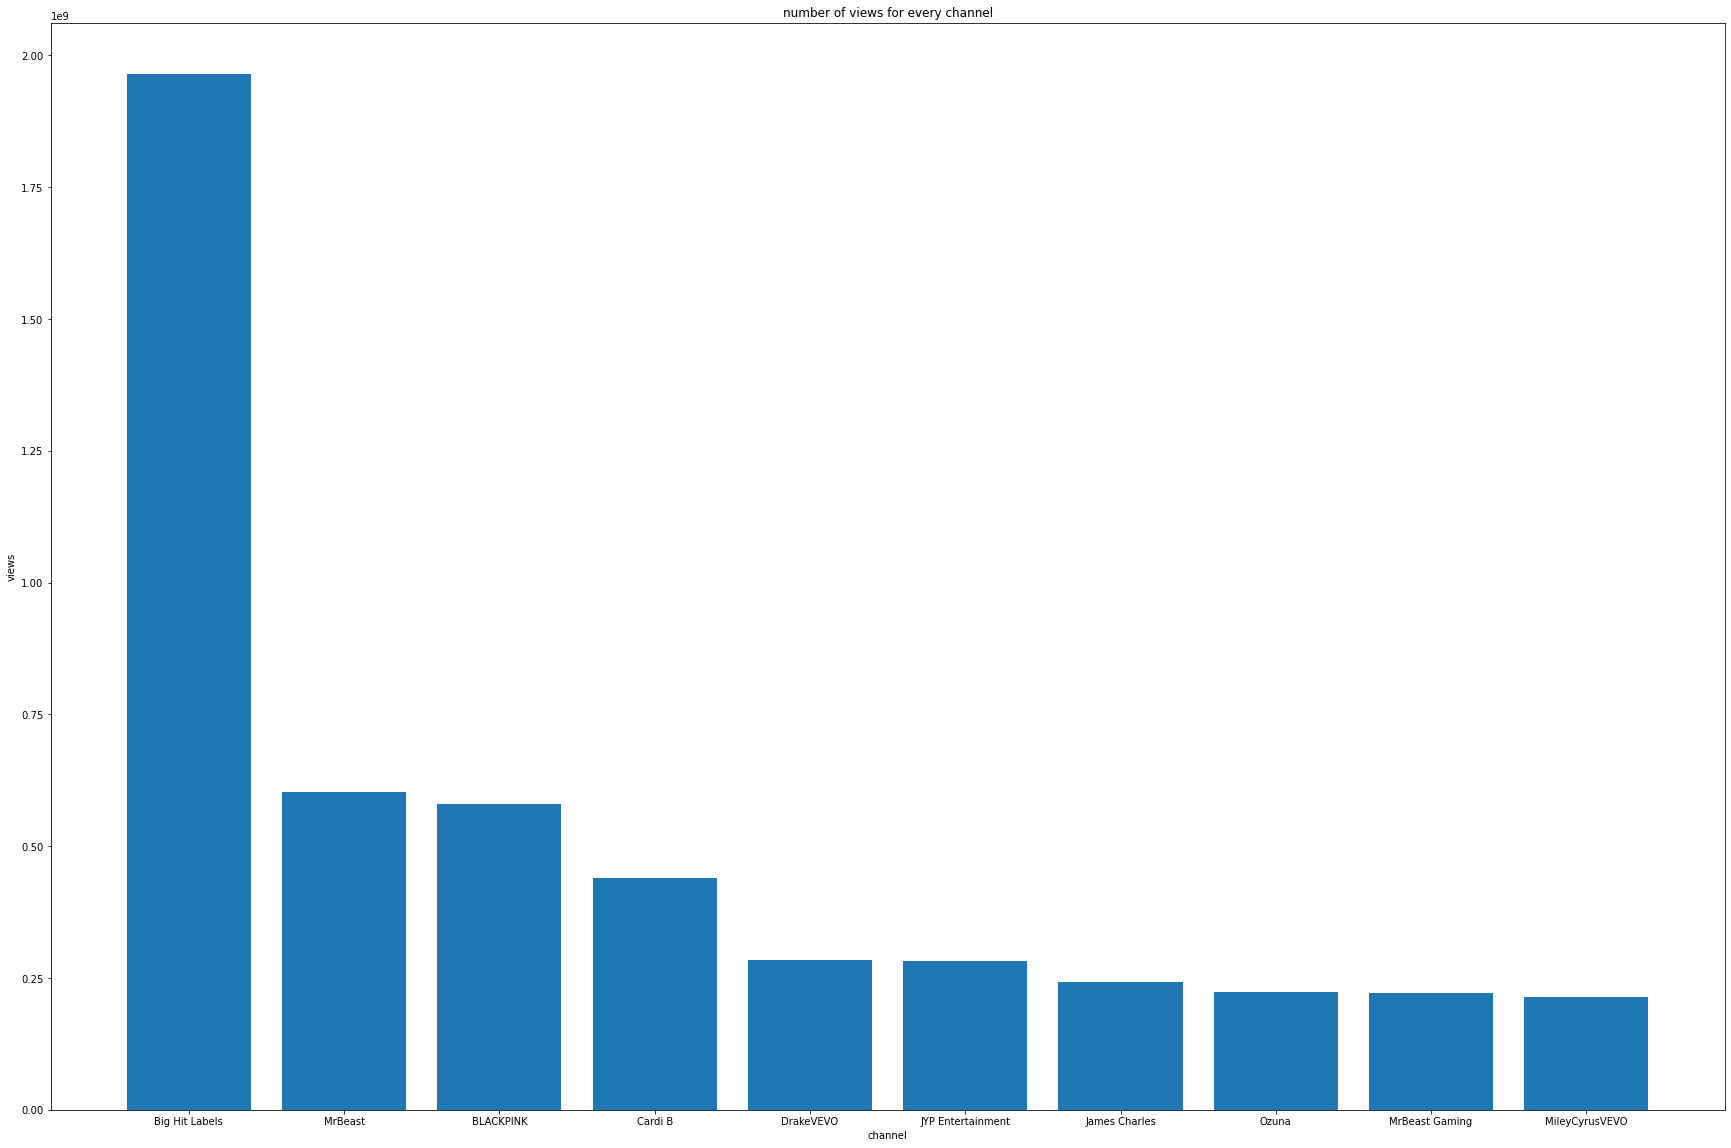

In [266]:
plt.figure(figsize=(30,20))
plt.xlabel('channel')
plt.ylabel('views')
plt.title('number of views for every channel');
plt.bar(AUG_view.channel,AUG_view.views);

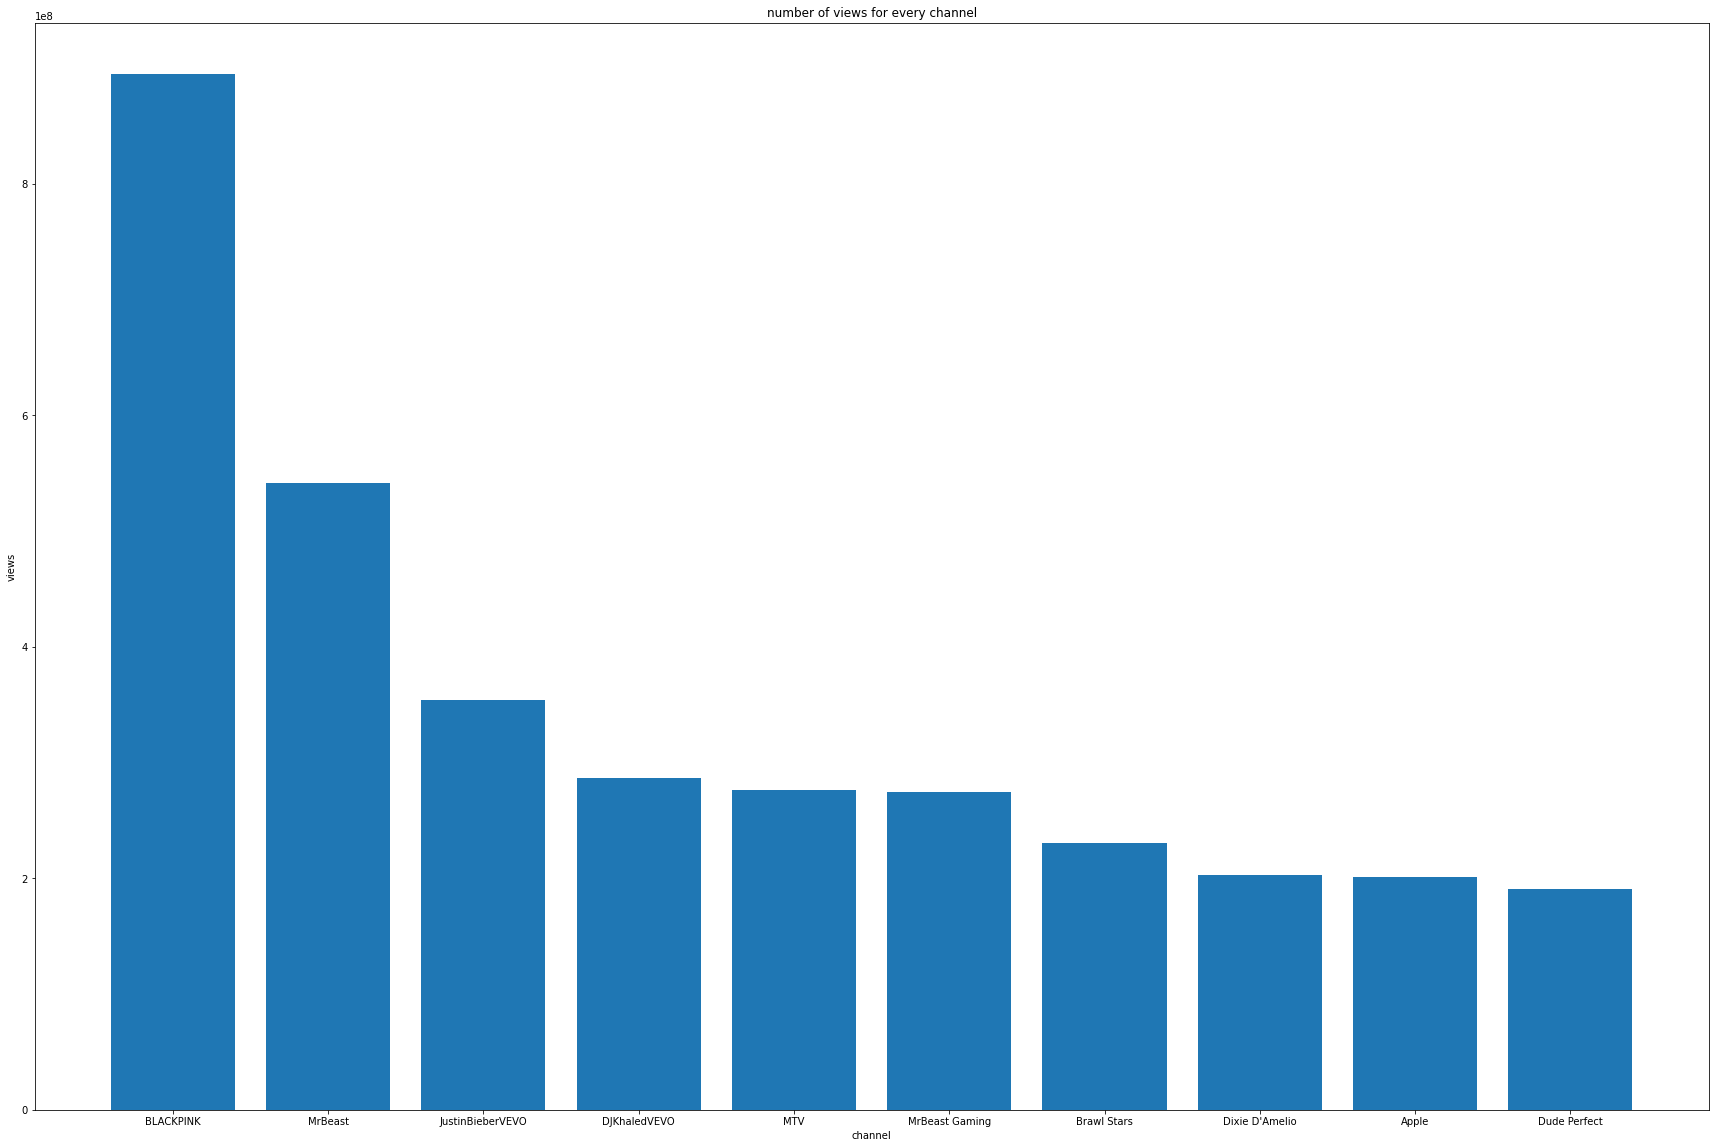

In [279]:
plt.figure(figsize=(30,20))
plt.xlabel('channel')
plt.ylabel('views')
plt.title('number of views for every channel');
plt.bar(Sep_view.channel,Sep_view.views);

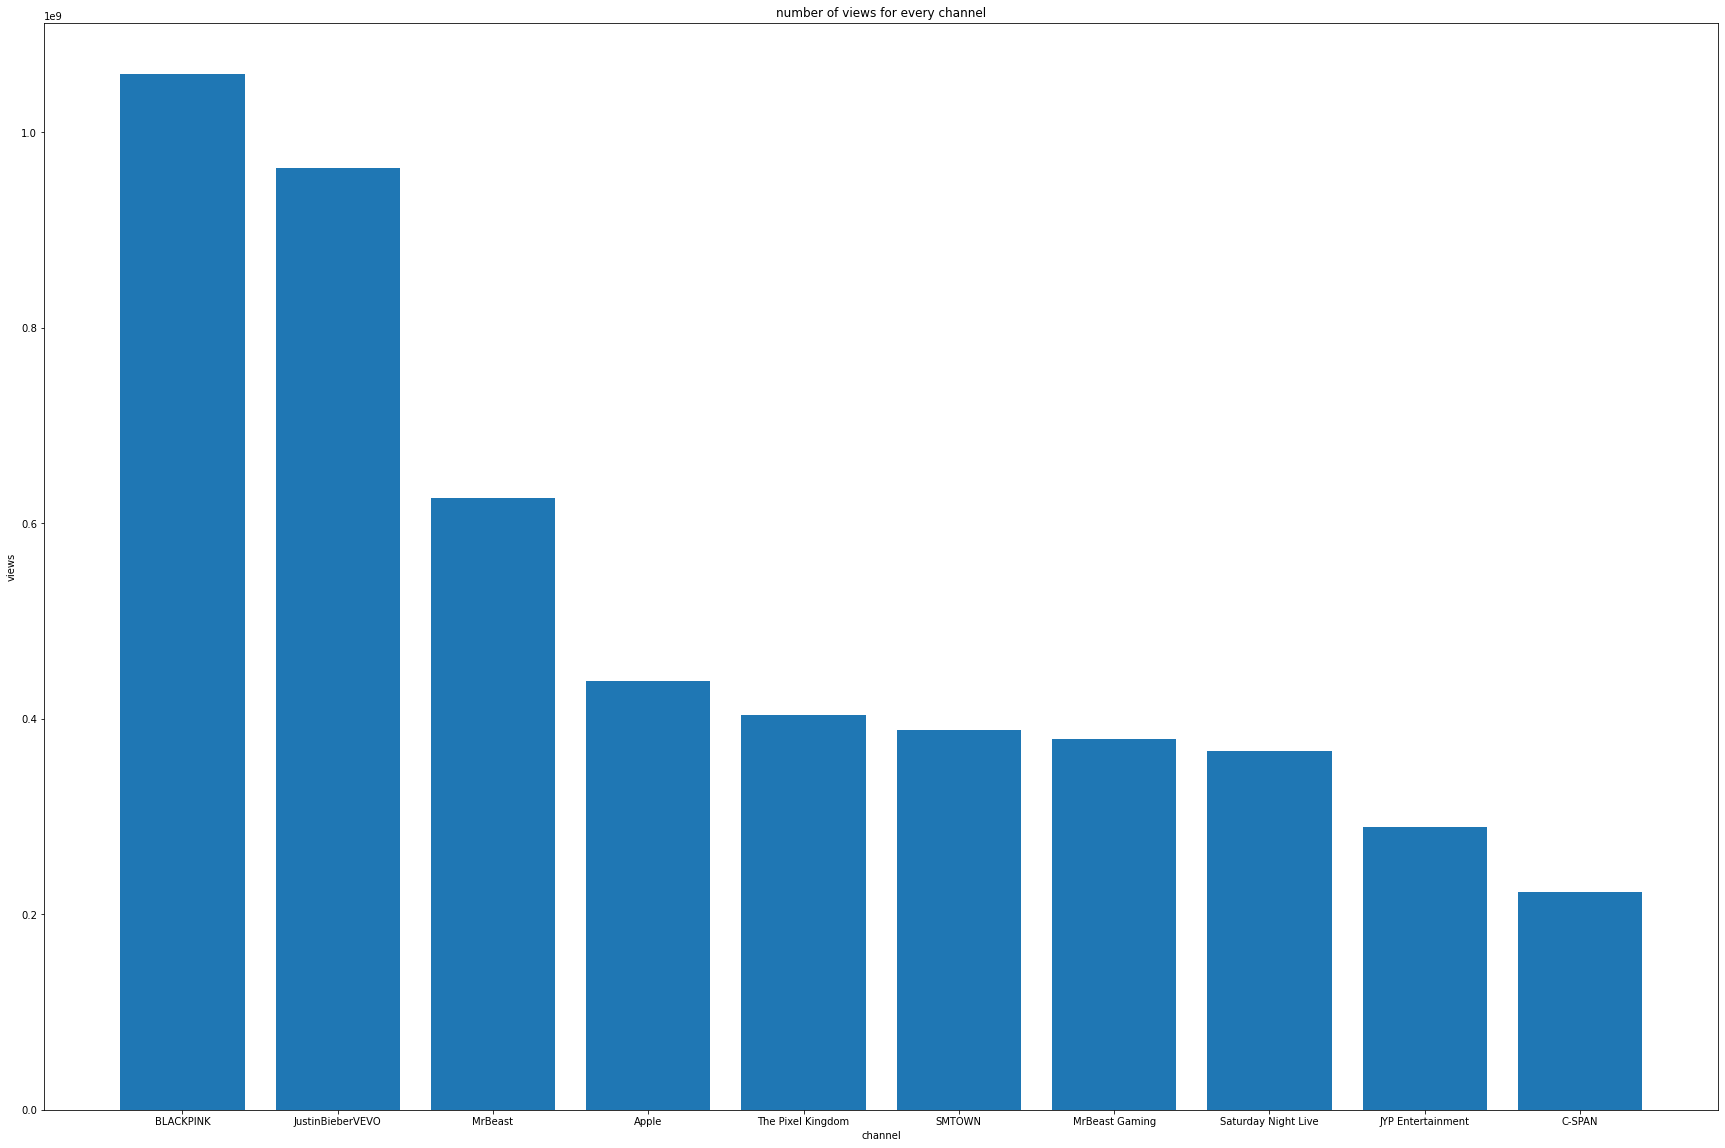

In [280]:
plt.figure(figsize=(30,20))
plt.xlabel('channel')
plt.ylabel('views')
plt.title('number of views for every channel');
plt.bar(Oct_view.channel,Oct_view.views);

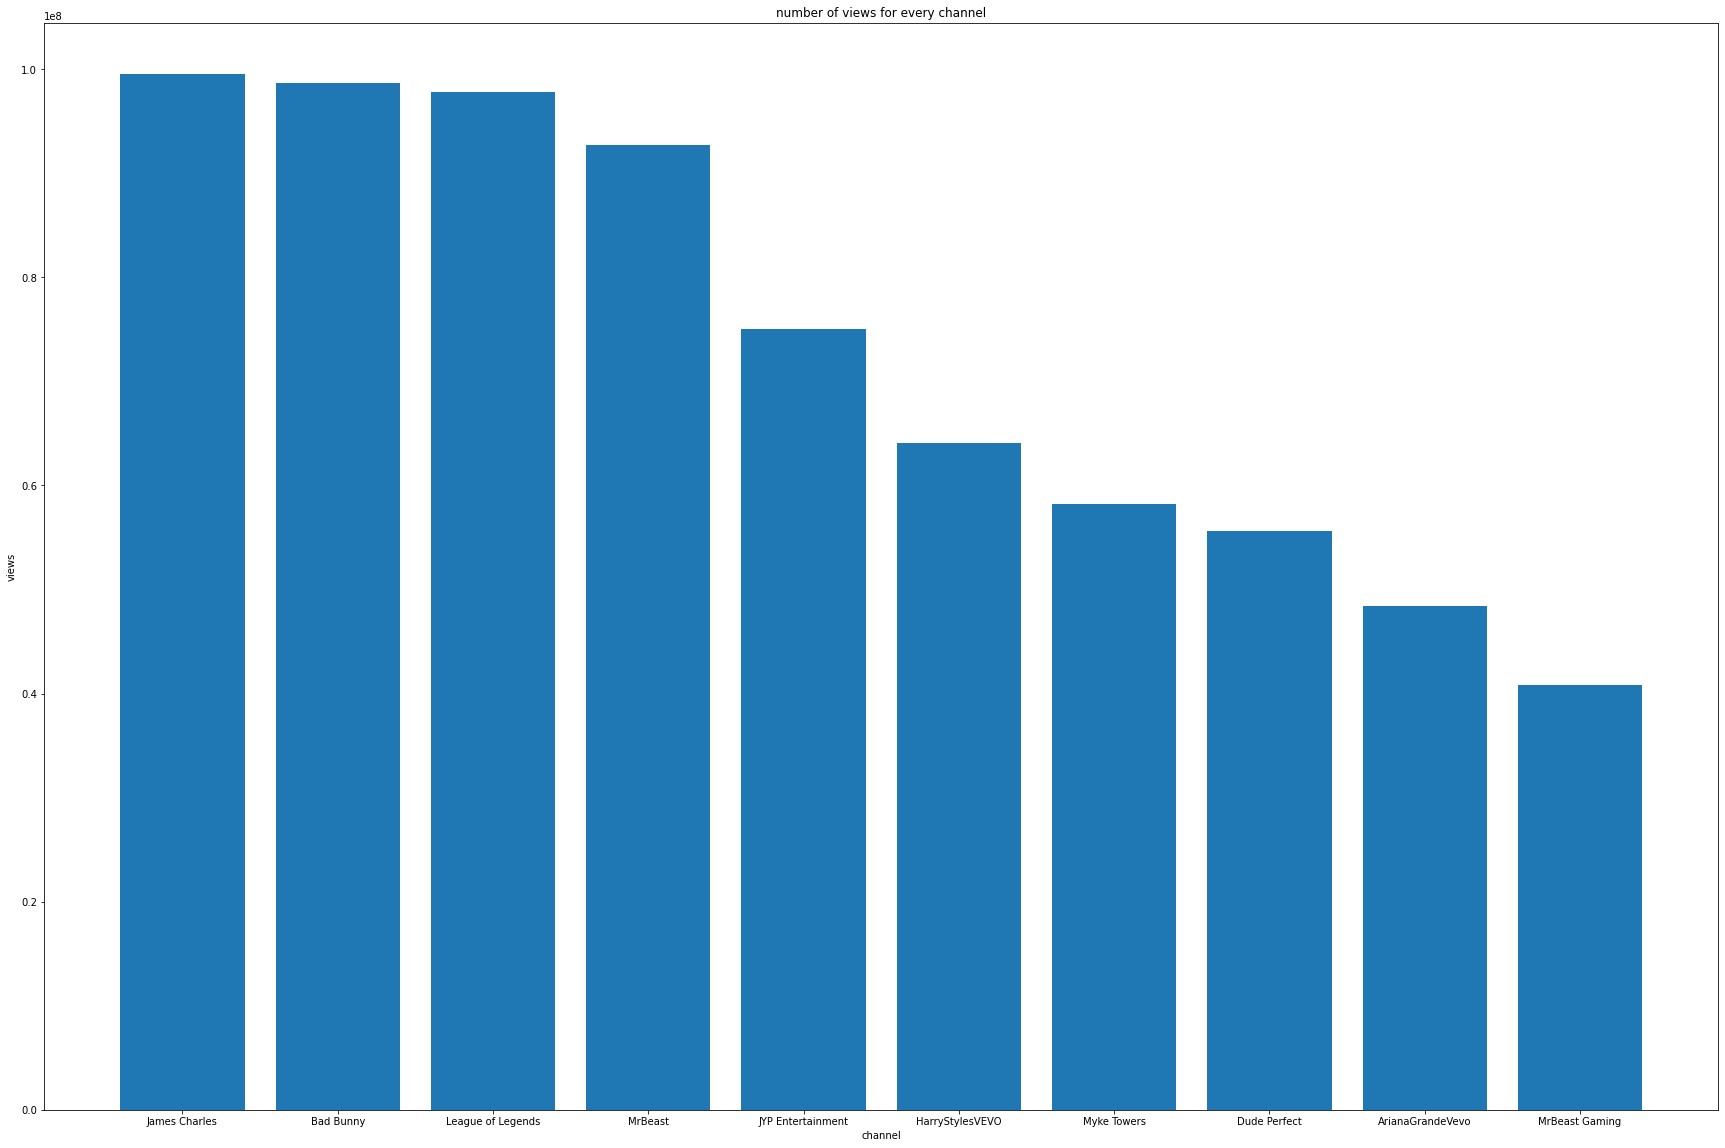

In [281]:
plt.figure(figsize=(30,20))
plt.xlabel('channel')
plt.ylabel('views')
plt.title('number of views for every channel');
plt.bar(Nov_view.channel,Nov_view.views);

# 17-comments for each category

In [236]:
category=trend_data.groupby(['category'])[['likes','dislikes']].sum()
category.sort_values('likes', ascending= False)
category.reset_index(level=['category'], inplace=True)
category = category.rename(columns = {"likes":"all_likes","dislikes":"all_dislikes"} )


category
#category.index


,category,all_likes,all_dislikes
0,Autos & Vehicles,18137001,252256
1,Comedy,125183995,1452860
2,Education,30087976,424419
3,Entertainment,503499734,9892407
4,Film & Animation,61918964,1165913
5,Gaming,223660391,6075003
6,Howto & Style,53134917,1593353
7,Music,1352160337,35802507
8,News & Politics,13068016,2345598
9,Nonprofits & Activism,879911,12366


In [301]:
trend_data['total_opinion']= pd.merge(category,trend_data, on='category', how='inner')
#trend_data.category ,category.category


In [293]:
category['perc_like'] = category['all_likes']/ category['all_likes'].sum()
category['perc_dislike'] = category['all_dislikes']/ category['all_dislikes'].sum()

category

,category,all_likes,all_dislikes,perc_like,perc_dislike
0,Autos & Vehicles,18137001,252256,0.006651,0.003609
1,Comedy,125183995,1452860,0.045905,0.020789
2,Education,30087976,424419,0.011033,0.006073
3,Entertainment,503499734,9892407,0.184635,0.141547
4,Film & Animation,61918964,1165913,0.022706,0.016683
5,Gaming,223660391,6075003,0.082017,0.086925
6,Howto & Style,53134917,1593353,0.019485,0.022799
7,Music,1352160337,35802507,0.495843,0.512286
8,News & Politics,13068016,2345598,0.004792,0.033562
9,Nonprofits & Activism,879911,12366,0.000323,0.000177


# 18-number of video based on each category 

In [314]:
v_category=trend_data.groupby(['category'])[['date_published']].count()
v_category.reset_index(level=['category'], inplace=True)
v_category = v_category.rename(columns = {"date_published":"n_videos"} )
v_category

,category,n_videos
0,Autos & Vehicles,307
1,Comedy,1058
2,Education,386
3,Entertainment,3146
4,Film & Animation,621
5,Gaming,1483
6,Howto & Style,739
7,Music,3838
8,News & Politics,673
9,Nonprofits & Activism,25


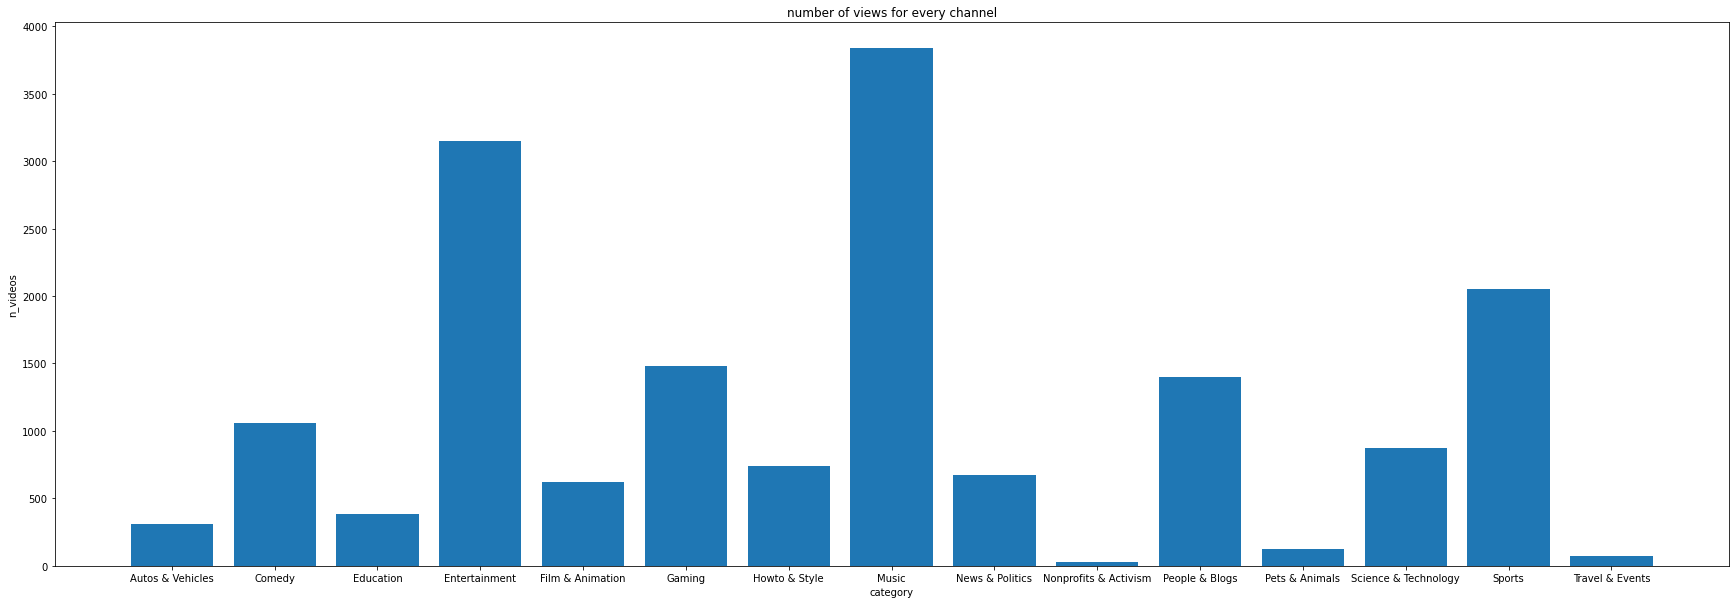

In [316]:
plt.figure(figsize=(30,10))
plt.xlabel('category')
plt.ylabel('n_videos')
plt.title('number of views for every channel');
plt.bar(v_category.category,v_category.n_videos);

# 19-describe reaction of viewer 

In [323]:
trend_data


,categoryId,category,title,publishedAt,channelId,channel,trending_date,tags,views,likes,dislikes,comments,description,date_published,time_published,date_trending,time_trending,month_trending,month_published,lag
6765,10,Music,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,2020-08-28 00:00:00+00:00,BIGHIT|ë¹…ížˆíŠ¸|ë°©íƒ„ì†Œë…„ë‹¨|BTS|BANGTAN|ë...,232649205,15735533,714194,6065230,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MVCr...,2020-08-21,03:58:10,2020-08-28,00:00:00,Aug,Aug,6 days 20:01:50
6709,10,Music,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,2020-08-27 00:00:00+00:00,BIGHIT|ë¹…ížˆíŠ¸|ë°©íƒ„ì†Œë…„ë‹¨|BTS|BANGTAN|ë...,219110491,15460822,674291,5810680,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MVCr...,2020-08-21,03:58:10,2020-08-27,00:00:00,Aug,Aug,5 days 20:01:50
6647,10,Music,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,2020-08-26 00:00:00+00:00,BIGHIT|ë¹…ížˆíŠ¸|ë°©íƒ„ì†Œë…„ë‹¨|BTS|BANGTAN|ë...,208581468,15246496,646349,5744496,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MVCr...,2020-08-21,03:58:10,2020-08-26,00:00:00,Aug,Aug,4 days 20:01:50
6586,10,Music,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,2020-08-25 00:00:00+00:00,BIGHIT|ë¹…ížˆíŠ¸|ë°©íƒ„ì†Œë…„ë‹¨|BTS|BANGTAN|ë...,200692965,14994034,621578,5623570,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MVCr...,2020-08-21,03:58:10,2020-08-25,00:00:00,Aug,Aug,3 days 20:01:50
6535,10,Music,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,2020-08-24 00:00:00+00:00,BIGHIT|ë¹…ížˆíŠ¸|ë°©íƒ„ì†Œë…„ë‹¨|BTS|BANGTAN|ë...,183414472,14678048,576852,5748638,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Dynamite' Official MVCr...,2020-08-21,03:58:10,2020-08-24,00:00:00,Aug,Aug,2 days 20:01:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15748,17,Sports,Eliminatorias | Ecuador vs Uruguay | Fecha 2,2020-10-14 01:06:40+00:00,UCzU8-lZlRfkV3nj0RzAZdrQ,CONMEBOL,2020-10-14 00:00:00+00:00,fÃºtbol|pelota|gol|copa|libertadores|sudameric...,623031,0,0,2360,Ecuador venciÃ³ 4-2 a Uruguay este martes en l...,2020-10-14,01:06:40,2020-10-14,00:00:00,Oct,Oct,-1 days +22:53:20
13805,25,News & Politics,Protesters demand Portland mayor's resignation,2020-09-01 14:07:05+00:00,UCXIJgqnII2ZOINSWNOGFThA,Fox News,2020-09-04 00:00:00+00:00,Fox News Channel|Fox News|News|america's newsr...,1120275,0,0,0,Demonstrators set fire outside mayor's condo b...,2020-09-01,14:07:05,2020-09-04,00:00:00,Sep,Sep,2 days 09:52:55
2129,20,Gaming,FINAL FANTASY XIV - Break the Limit!,2020-09-24 10:20:50+00:00,UCpx2BZg8ABgaDV50sGJtWAg,FINAL FANTASY XIV,2020-09-25 00:00:00+00:00,FF14|FFXIV|Final Fantasy XIV (Video Game)|ãƒ•ã...,289494,0,0,0,NaN,2020-09-24,10:20:50,2020-09-25,00:00:00,Sep,Sep,0 days 13:39:10
501,22,People & Blogs,Behind the Scenes of My Sailor Photoshoot,2020-09-08 21:16:38+00:00,UCWkYXtnAuu7VTLPwUcRSB6A,Kylie Jenner,2020-09-09 00:00:00+00:00,Kylie Cosmetics|Kylie Jenner|Makeup|BTS|Behind...,1286513,0,0,4643,Come behind the scenes with me at the photosho...,2020-09-08,21:16:38,2020-09-09,00:00:00,Sep,Sep,0 days 02:43:22


In [365]:
date_815=trend_data[['views', 'likes', 'dislikes', 'date_published','comments']]
date_815=date_815.loc[date_815['date_published']== "2020-08-15"]
date_815

,views,likes,dislikes,date_published,comments


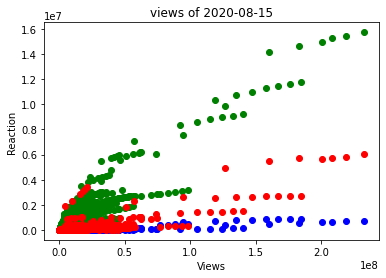

In [344]:
fig=plt.figure()

plt.scatter(date_815['views'], date_815['likes'], color='green')
plt.scatter(date_815['views'], date_815['dislikes'], color='blue')
plt.scatter(date_815['views'], date_815['comments'], color='red')

plt.xlabel('Views')
plt.ylabel('Reaction')
plt.title('views of 2020-08-15')
 
plt.show()

In [363]:
date_915=trend_data[['views', 'likes', 'dislikes', 'date_published','comments']]
date_915=date_815.loc[date_815['date_published']== "2020-09-15"]
date_915


,views,likes,dislikes,date_published,comments


In [ ]:
fig=plt.figure()

plt.scatter(date_915['views'], date_915['likes'], color='green')
plt.scatter(date_915['views'], date_915['dislikes'], color='blue')
plt.scatter(date_915['views'], date_915['comments'], color='red')

plt.xlabel('Views')
plt.ylabel('Reaction')
plt.title('views of 2020-09-15')
 
plt.show()

In [ ]:
date_1015=trend_data[['views', 'likes', 'dislikes', 'date_published','comments']]
date_1015=date_815.loc[date_1015['date_published']== "2020-10-15"]
date_1015

fig=plt.figure()

plt.scatter(date_1015['views'], date_1015['likes'], color='green')
plt.scatter(date_1015['views'], date_1015['dislikes'], color='blue')
plt.scatter(date_1015['views'], date_1015['comments'], color='red')

plt.xlabel('Views')
plt.ylabel('Reaction')
plt.title('views of 2020-10-15')
 
plt.show()

In [ ]:
date_1101=trend_data[['views', 'likes', 'dislikes', 'date_published','comments']]
date_1101=date_815.loc[date_1101['date_published']== "2020-11-01"]
date_1101

fig=plt.figure()

plt.scatter(date_1101['views'], date_1101['likes'], color='green')
plt.scatter(date_1101['views'], date_1101['dislikes'], color='blue')
plt.scatter(date_1101['views'], date_1101['comments'], color='red')
plt.ylabel('Reaction')
plt.title('views of 2020-11-01')
 
plt.show()

# 20- 100 top videos

In [378]:
top_views=trend_data[['views', 'likes', 'dislikes','comments']]
top_views.sort_values('views',ascending=False, inplace=True)
top_views.head(100)


<ipython-input-378-bef721070256>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_views.sort_values('views',ascending=False, inplace=True)


,views,likes,dislikes,comments
6765,232649205,15735533,714194,6065230
6709,219110491,15460822,674291,5810680
6647,208581468,15246496,646349,5744496
6586,200692965,14994034,621578,5623570
7167,184778248,11795670,879354,2735997
...,...,...,...,...
7421,37819086,1986799,91770,111551
8146,37731225,2364416,57780,177132
8214,37422074,1792042,40106,543761
6366,37135897,643583,33395,55183


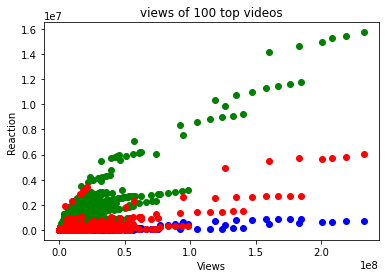

In [379]:
fig=plt.figure()

plt.scatter(top_views['views'], top_views['likes'], color='green')
plt.scatter(top_views['views'], top_views['dislikes'], color='blue')
plt.scatter(top_views['views'], top_views['comments'], color='red')

plt.xlabel('Views')
plt.ylabel('Reaction')
plt.title('views of 100 top videos')
 
plt.show()

# 21-Analyse comments based on category

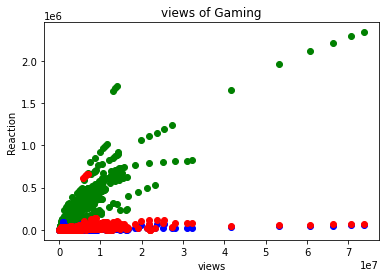

In [384]:
Gaming_views=trend_data[['views', 'likes', 'dislikes','comments','category']]
Gaming_views=Gaming_views.loc[Gaming_views['category']== "Gaming"]
Gaming_views

fig=plt.figure()

plt.scatter(Gaming_views['views'], Gaming_views['likes'], color='green')
plt.scatter(Gaming_views['views'], Gaming_views['dislikes'], color='blue')
plt.scatter(Gaming_views['views'], Gaming_views['comments'], color='red')
plt.ylabel('Reaction')
plt.xlabel('views')

plt.title('views of Gaming')
 
plt.show()

In [382]:
trend_data.category.unique()

array(['Music', 'Entertainment', 'Gaming', 'Comedy', 'People & Blogs',
       'Autos & Vehicles', 'Science & Technology', 'Howto & Style',
       'Sports', 'Film & Animation', 'Education', 'News & Politics',
       'Pets & Animals', 'Nonprofits & Activism', 'Travel & Events'],
      dtype=object)

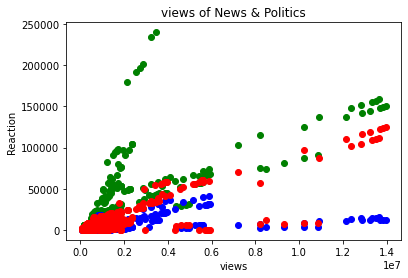

In [385]:
NewsPolitics_views=trend_data[['views', 'likes', 'dislikes','comments','category']]
NewsPolitics_views=NewsPolitics_views.loc[NewsPolitics_views['category']== "News & Politics"]
NewsPolitics_views

fig=plt.figure()

plt.scatter(NewsPolitics_views['views'], NewsPolitics_views['likes'], color='green')
plt.scatter(NewsPolitics_views['views'], NewsPolitics_views['dislikes'], color='blue')
plt.scatter(NewsPolitics_views['views'], NewsPolitics_views['comments'], color='red')
plt.ylabel('Reaction')
plt.xlabel('views')

plt.title('views of News & Politics')
 
plt.show()

# 22-analyse reaction based on title

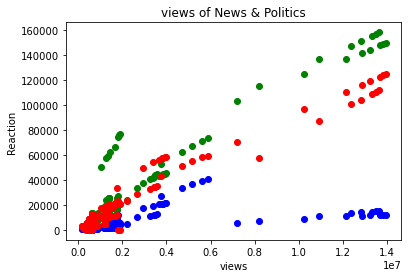

In [398]:
title_views=trend_data[['views', 'likes', 'dislikes','comments','category', 'title']]
title_views=title_views[(title_views['title'].str.contains('Trump')) & (title_views['category']== "News & Politics") ]
title_views


fig=plt.figure()

plt.scatter(title_views['views'], title_views['likes'], color='green')
plt.scatter(title_views['views'], title_views['dislikes'], color='blue')
plt.scatter(title_views['views'], title_views['comments'], color='red')
plt.ylabel('Reaction')
plt.xlabel('views')

plt.title('views of News & Politics')
 
plt.show()

# 23- world cloud

In [ ]:
pip install wordcloud

In [4]:
from wordcloud import WordCloud, STOPWORDS

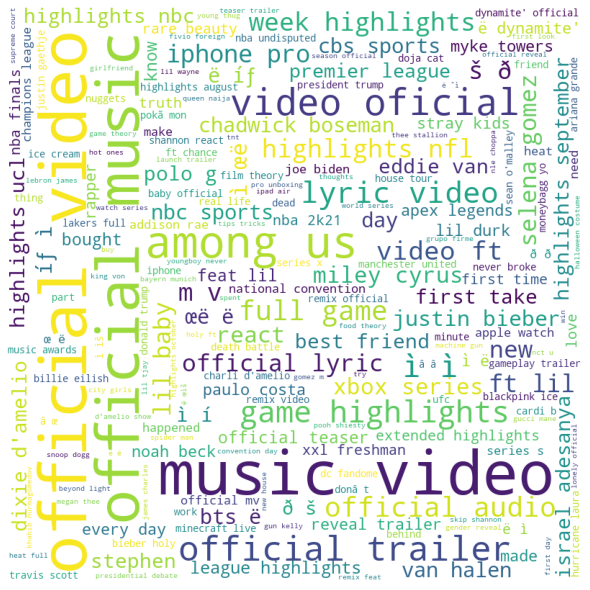

In [6]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in trend_data.title:  
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 8).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()